# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

dataframes = [df_tesla, df_btc_search, df_btc_price, df_unemployment]

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
i = 1
for df in dataframes:
    print(i)
    print(df.head())
    print(df.shape)
    i += 1

1
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
(124, 3)
2
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
(73, 2)
3
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
(2204, 3)
4
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
(181, 3)


In [4]:
print(f'Largest value for Tesla in Web Search: ')
print(df_tesla.describe()['TSLA_WEB_SEARCH']['max'])
print(f'Smallest value for Tesla in Web Search: ')
print(df_tesla.describe()['TSLA_WEB_SEARCH']['min'])

Largest value for Tesla in Web Search: 
31.0
Smallest value for Tesla in Web Search: 
2.0


In [5]:
df_tesla.describe().loc(0)['max']

TSLA_WEB_SEARCH     31.000000
TSLA_USD_CLOSE     498.320007
Name: max, dtype: float64

### Unemployment Data

In [6]:
df_unemployment.head(1)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7


In [7]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')
df_unemployment.describe().loc(0)['max']
df_unemployment.describe().loc(0)['max']

Largest value for "Unemployemnt Benefits" in Web Search: 


UE_BENEFITS_WEB_SEARCH    100.0
UNRATE                     10.0
Name: max, dtype: float64

### Bitcoin

In [8]:
df_btc_price.describe().loc(0)['max']

CLOSE     1.949740e+04
VOLUME    7.415677e+10
Name: max, dtype: float64

In [9]:
print(f'largest BTC News Search: ')
df_btc_search.describe().loc(0)['max']

largest BTC News Search: 


BTC_NEWS_SEARCH    100.0
Name: max, dtype: float64

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [10]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')
df_tesla.isna()
df_unemployment.dropna()
df_btc_search.dropna()

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [11]:
print(f'Missing values for BTC price?: ')
df_btc_price[df_btc_price.isna().any(axis=1)]

Missing values for BTC price?: 


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [12]:
print(f'Number of missing values: ')
(df_btc_price.shape[0] - df_btc_price.count()).sum()
# returns a dataframe where the rows are the original columns and the column is the number of NaN values.
# Sum the columns to get the total number of NaN values
df_btc_price.isna().any().sum()

Number of missing values: 


2

**Challenge**: Remove any missing values that you found. 

In [13]:
df_btc_price.dropna()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [14]:
type(df_tesla['MONTH'][0]), type(df_btc_search['MONTH'][0]), type(df_btc_price['DATE'][0]), type(df_unemployment['MONTH'][0])

(str, str, str, str)

In [15]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [16]:
type(df_tesla['MONTH'][0]), type(df_btc_search['MONTH'][0]), type(df_btc_price['DATE'][0]), type(df_unemployment['MONTH'][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [17]:
end_month_btc_price = df_btc_price.resample(rule="M", on="DATE")
end_month_btc_price.mean().head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


In [18]:
end_month_btc_price.last()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

200

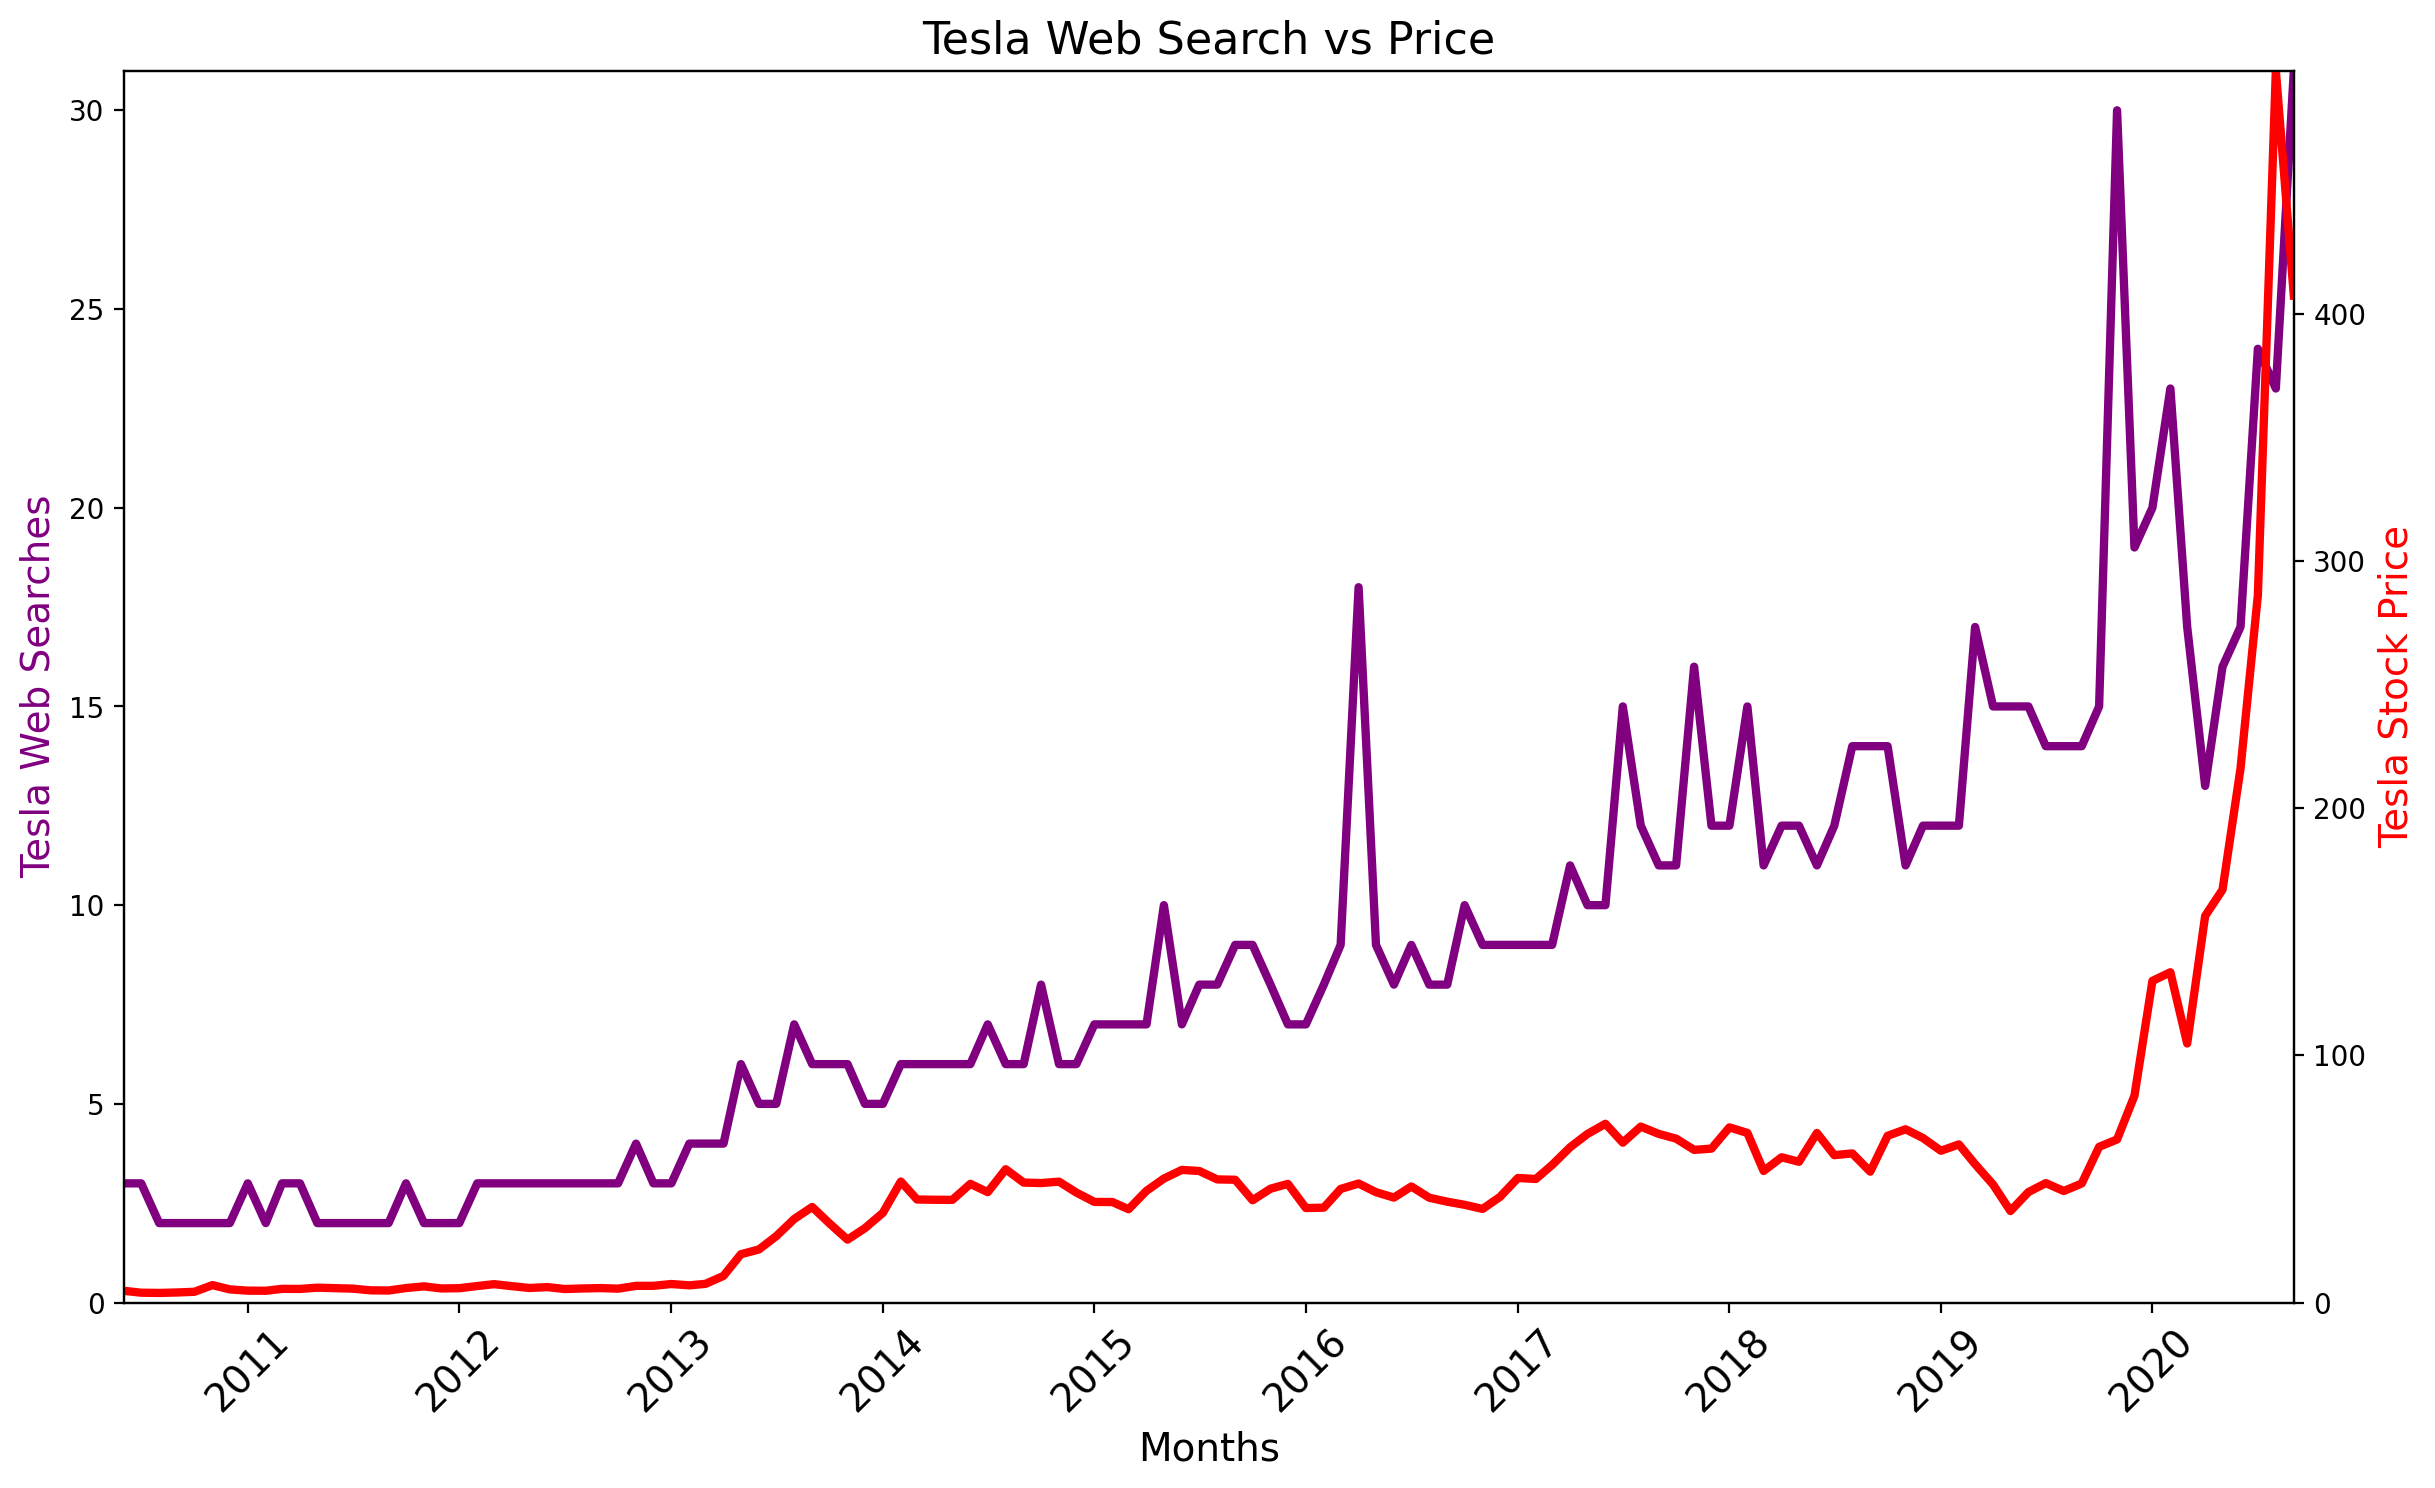

In [61]:
# Create locators for ticks on the time axis
chart_figure = plt.figure(figsize=(14, 8), dpi=200)
plt.title("Tesla Web Search vs Price", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax1.set_xlim(df_tesla.MONTH[0], df_tesla.MONTH[len(df_tesla.MONTH) - 1])
ax1.set_ylim(0, df_tesla.TSLA_WEB_SEARCH.max())
ax2 = ax1.twinx()
ax2.set_ylim(0, df_tesla.TSLA_USD_CLOSE.max())
ax1.set_xlabel("Months", fontsize=14)
ax1.set_ylabel("Tesla Web Searches", color="purple", fontsize=14)
ax2.set_ylabel("Tesla Stock Price", color="#FF0000", fontsize=14)
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="purple", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#FF0000", linewidth=3)
chart_figure.get_dpi()

In [20]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?